<a href="https://colab.research.google.com/github/Eduard953/Image_Processing_SS20/blob/master/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing SS 20 - Assignment - 10

### Deadline is 01.07.2020 at 11:55 am

Eduard Beiline, Bernard Breljak

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.linalg
from skimage.color import rgb2gray
from skimage.data import chelsea
from scipy.fftpack import dct, idct
from numpy.fft import fft2 as numpy_fft2
import math

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

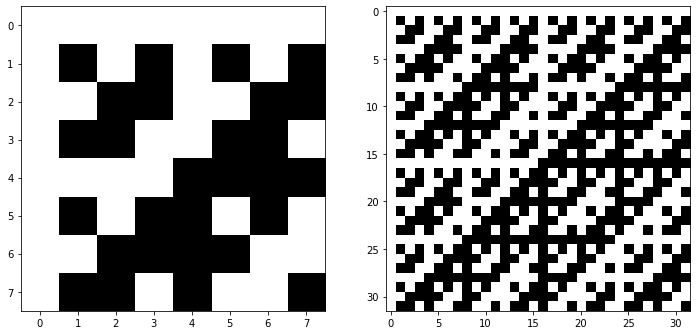

In [3]:
def hadamard_matrix(n):
    """Returns the Hadamard matrix. N is a power of two."""
    if n < 1:
        rec = 0
    else:
        rec = int(math.log(n, 2))

    H = np.array([[1]])

    # Sylvester's construction for n elem 2^n
    for i in range(0, rec):
        H = np.vstack((np.hstack((H, H)), np.hstack((H, -H))))

    return H
    #return scipy.linalg.hadamard(n) / np.sqrt(n) # Weiss nicht wieso das hier ist. Hab dieses Sylvester Ding aus Wiki benutzt. Also kp.

plt.subplot(121)
plt.imshow(hadamard_matrix(8), cmap='gray')
plt.subplot(122)
plt.imshow(hadamard_matrix(32), cmap='gray')
plt.show()

In [4]:
def get_chess_board(n=8, field_size=8):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board

def get_sinus_board(n=8, field_size=8, shift=0):
    img_size = n*field_size
    linsp = np.linspace(-shift, np.pi*n - shift, img_size).reshape((img_size, 1))
    return np.dot(np.sin(linsp), np.sin(linsp.T))


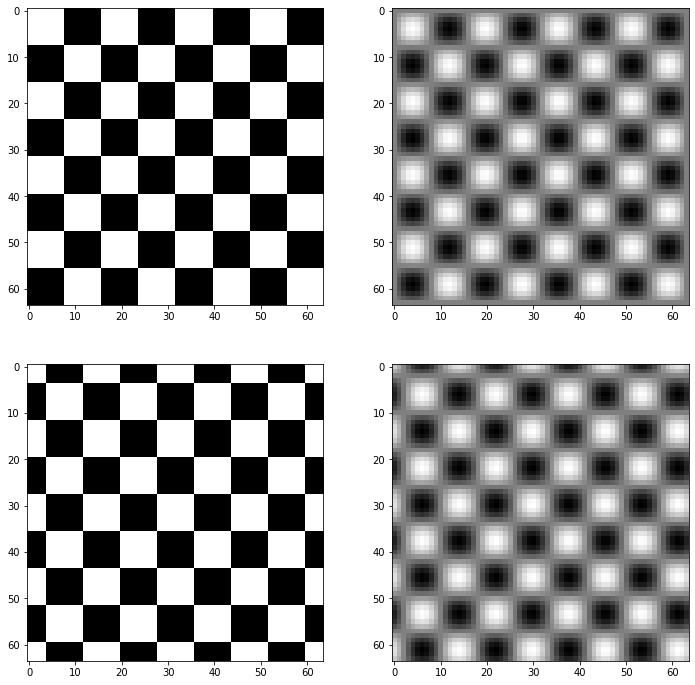

In [5]:
chess_board = get_chess_board()
chess_board_roll = np.roll(np.roll(chess_board, 4, axis=0), 4, axis=1)
sinus_board = get_sinus_board()
sinus_board_roll = get_sinus_board(shift=4)
plt.subplot(221)
plt.imshow(chess_board, cmap='gray', interpolation='nearest')
plt.subplot(222)
plt.imshow(sinus_board, cmap='gray')
plt.subplot(223)
plt.imshow(chess_board_roll, cmap='gray', interpolation='nearest')
plt.subplot(224)
plt.imshow(sinus_board_roll, cmap='gray')
plt.show()

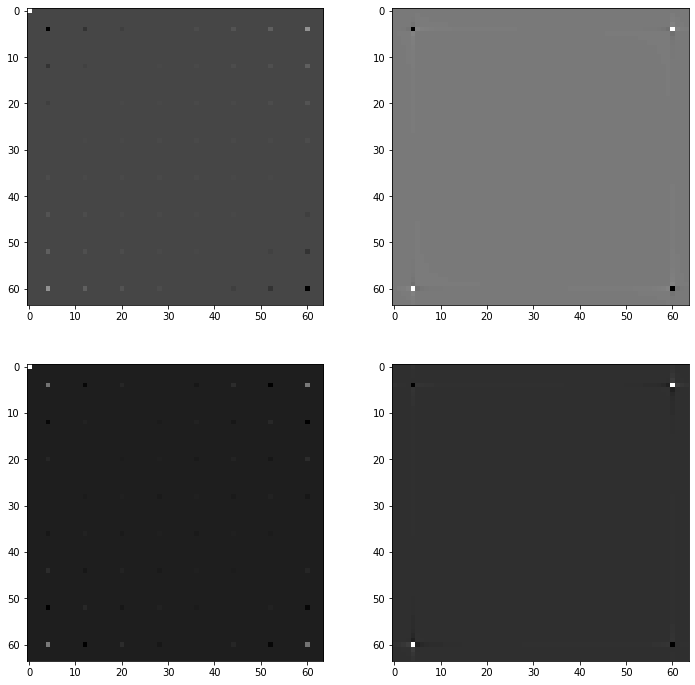

In [6]:
# Plot the fourier transformation of chess boards and sinus boards. 
# You can use some functions from np.ftt
chess_board_ft = numpy_fft2(chess_board)                     # your code here
chess_board_roll_ft = numpy_fft2(chess_board_roll)
sinus_board_ft = numpy_fft2(sinus_board)
sinus_board_roll_ft = numpy_fft2(sinus_board_roll)

plt.subplot(221)
plt.imshow(chess_board_ft.real, cmap='gray', interpolation='nearest')
plt.subplot(222)
plt.imshow(sinus_board_ft.real, cmap='gray')
plt.subplot(223)
plt.imshow(chess_board_roll_ft.real, cmap='gray', interpolation='nearest')
plt.subplot(224)
plt.imshow(sinus_board_roll_ft.real, cmap='gray')
plt.show()

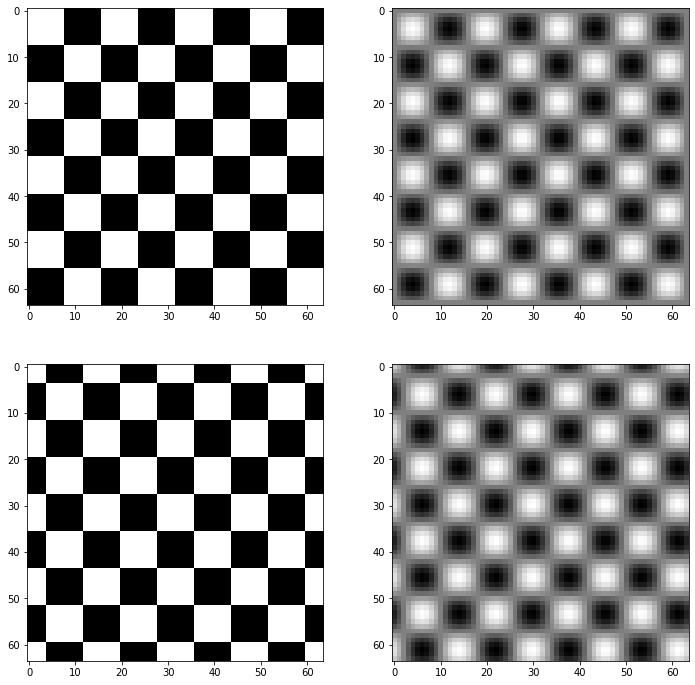

In [7]:
# Plot the fourier transformation of chess boards and sinus boards. 
# You can use some functions from np.ftt
chess_board_ft = chess_board                      # your code here
chess_board_roll_ft = chess_board_roll
sinus_board_ft = sinus_board
sinus_board_roll_ft = sinus_board_roll

plt.subplot(221)
plt.imshow(chess_board_ft.real, cmap='gray', interpolation='nearest')
plt.subplot(222)
plt.imshow(sinus_board_ft.real, cmap='gray')
plt.subplot(223)
plt.imshow(chess_board_roll_ft.real, cmap='gray', interpolation='nearest')
plt.subplot(224)
plt.imshow(sinus_board_roll_ft.real, cmap='gray')
plt.show()

# Exercise 2 - Compare DCT with Discrete Hadamard Transformation - 5 Points

In [8]:
class Blocks:
    """Transforms an image to blocks. A (512, 512) image will become an (64, 64, 8, 8) numpy array"""
    def __init__(self, block_size=8):
        self.block_size = block_size

    def __call__(self, img):
        b = self.block_size
        height, width = img.shape

        assert img.shape[0] % b == 0
        assert img.shape[1] % b == 0
        blocks = np.zeros((height // b, width // b, b, b), dtype=img.dtype)
        for i in range(0, height // b):
            for j in range(0, width // b):
                blocks[i, j] = img[i*b:(i+1)*b, j*b:(j+1)*b]
        return blocks
    def invert(self, blocks):
        bh, bw = blocks.shape[:2]
        b = self.block_size
        heigth, width = (bh*self.block_size, bw*self.block_size)

        img = np.zeros((heigth, width), dtype=blocks.dtype)
        for i in range(0, bh):
            for j in range(0, bw):
                img[i*b:(i+1)*b, j*b:(j+1)*b] = blocks[i, j]
        return img

In [9]:
class DCTofBlocks:
    def __call__(self, blocks):
        """Returns the DCT of the blocks. The position (i, j) is a 2-dim numpy array with the dct coefficents."""
        # you can use any function from np.fft or scipy.fftpack
        result = np.zeros_like(blocks)
        for row in range(0,blocks.shape[0]):
            for column in range(0,blocks.shape[1]):
                result[row][column] = dct(dct(blocks[row][column], axis=0, norm='ortho' ), axis=1, norm='ortho' )
        return result

    def invert(self, blocks):
        """Computes the inverse DCT."""
        # you can use any function from np.fft or scipy.fftpack
        result = np.zeros_like(blocks)
        for row in range(0,blocks.shape[0]):
            for column in range(0,blocks.shape[1]):
                result[row][column] = idct(idct(blocks[row][column], axis=0 , norm='ortho'), axis=1 , norm='ortho')
        return result

In [10]:
class HadamardofBlocksSequenceOrdering:
    def __call__(self, blocks):
      
      # liest die jumps in der frequenz
      def sign_changes(input):
              empty_list = []
              for a in range(len(input)):
                prev = input[a][0] 
                ret = 0
                for elem in input[a]: 
                  if elem == 0: 
                    sign = -1
                  else: 
                    sign = elem / abs(elem) 
                  if sign == -prev: 
                    ret = ret + 1
                    prev = sign 
                empty_list.append(ret)
              return empty_list

      # convertiert int zu binary 
      def convert_to_binary(x):
        return "{:03b}".format(x)

      #konvertiert binary zu gray code
      def convert_gray(binary):
        binary = int(binary, 2)
        binary ^= (binary >> 1)
        return bin(binary)[2:]

      #spiegelt gray code
      def reverse_bits_table(n):
        neww=''.join(reversed(n))
        return neww

      # erstellt die sequence
      def create_seq(input):
        new_list = []
        for a in sign_changes(input):
          new_list.append(int(convert_gray(reverse_bits_table(convert_to_binary(a))),2))
        return new_list

      # reordered den input nach der sequence
      def reorder(input, seq):
        ret = np.zeros((input.shape[0],input.shape[1]))
        for a in seq:
          ret[seq[a]] = input[a]  
        return ret

      # reordered den block
      h = hadamard_matrix(blocks.shape[3])
      reorder(h, create_seq(h))
      blocks = (h @ blocks) @ h

      return blocks

    def invert(self, blocks):

      # liest die jumps in der frequenz
      def sign_changes(input):
              empty_list = []
              for a in range(len(input)):
                prev = input[a][0] 
                ret = 0
                for elem in input[a]: 
                  if elem == 0: 
                    sign = -1
                  else: 
                    sign = elem / abs(elem) 
                  if sign == -prev: 
                    ret = ret + 1
                    prev = sign 
                empty_list.append(ret)
              return empty_list

      # convertiert int zu binary 
      def convert_to_binary(x):
        return "{:03b}".format(x)

      #konvertiert binary zu gray code
      def convert_gray(binary):
        binary = int(binary, 2)
        binary ^= (binary >> 1)
        return bin(binary)[2:]

      #spiegelt gray code
      def reverse_bits_table(n):
        neww=''.join(reversed(n))
        return neww

      # erstellt die sequence
      def create_seq(input):
        new_list = []
        for a in sign_changes(input):
          new_list.append(int(reverse_bits_table(convert_gray(convert_to_binary(a))),2))
        return new_list

      # reordered den input nach der sequence
      def reorder(input, seq):
        ret = np.zeros((input.shape[0],input.shape[1]))
        for a in seq:
          ret[seq[a]] = input[a]  
        return ret

      h = hadamard_matrix(blocks.shape[3])

      return blocks

In [11]:
class ZigZag:
    def __init__(self, n):
        self.n = n
        """Adapted from here: https://rosettacode.org/wiki/Zig-zag_matrix#Python"""
        def key(pair):
            x, y = pair
            return x+y, -y if (x+y) % 2 else y

        indexorder = sorted(((x,y) for x in range(n) for y in range(n)), key=key)
        self.xs = np.zeros((self.n**2,), dtype=np.int)
        self.ys = np.zeros((self.n**2,), dtype=np.int)
        self.back = np.zeros((n, n), dtype=np.int)
        for i, (x, y) in enumerate(indexorder):
            self.xs[i] = x
            self.ys[i] = y
            self.back[x, y] = i

    def __call__(self, blocks):
        bh, bw, h, w = blocks.shape
        zigzack_blocks = np.zeros((bh, bw, h*w), dtype=blocks.dtype)
        for i, block_row in enumerate(blocks):
            for j, block in enumerate(block_row):
                zigzack_blocks[i, j] = block[self.xs, self.ys]
        return zigzack_blocks

    def invert(self, zigzack_blocks):
        bh, bw, hw = zigzack_blocks.shape
        h = int(np.sqrt(hw))
        blocks = np.zeros((bh, bw, h, h), dtype=zigzack_blocks.dtype)
        for i, zigzack_row in enumerate(zigzack_blocks):
            for j, zigzack in enumerate(zigzack_row):
                blocks[i, j] = zigzack[self.back]
        return blocks

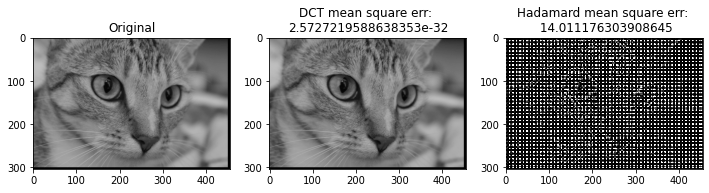

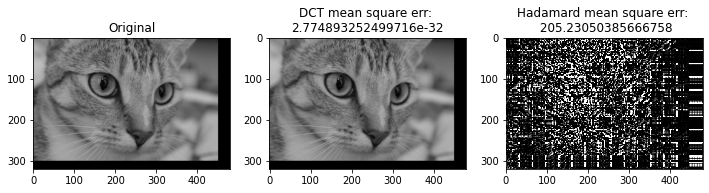

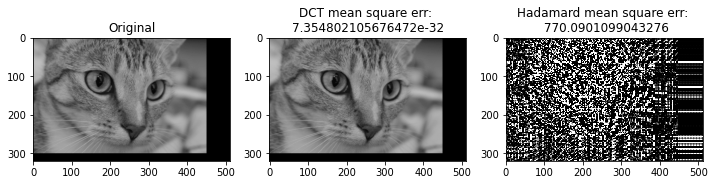

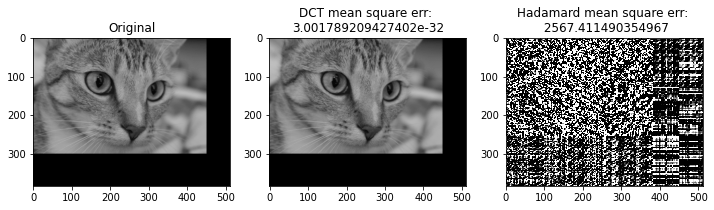

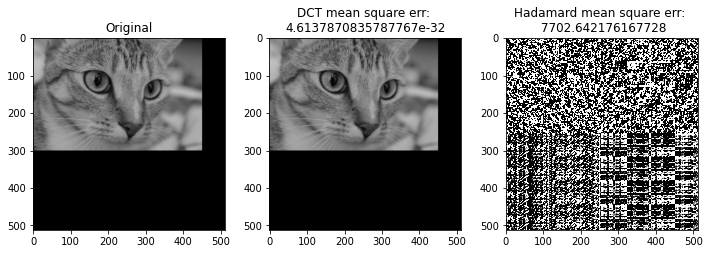

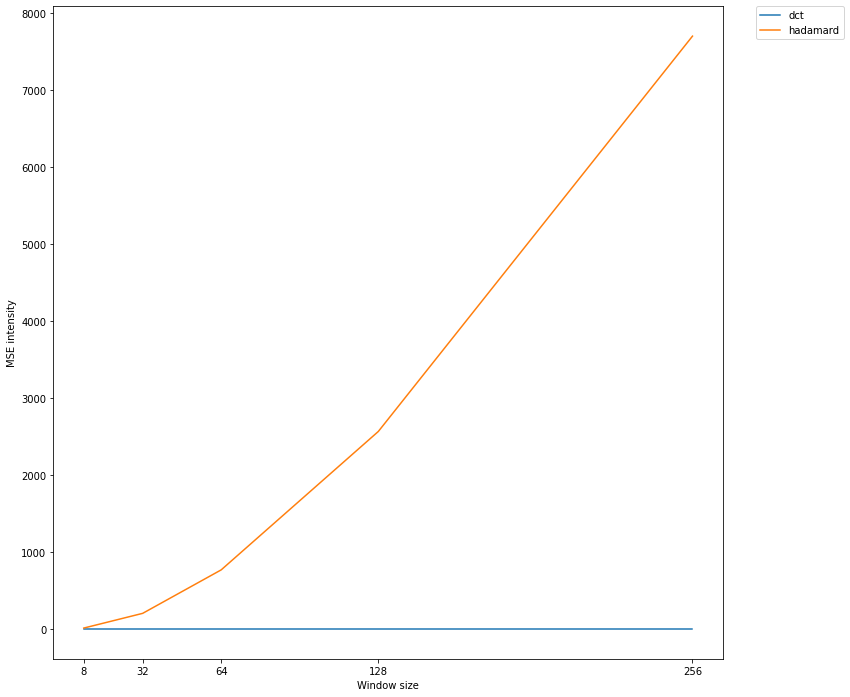

In [12]:
class PickNZigZag:
    def __init__(self, n=1):
        self.n = n

    def __call__(self, blocks):
        """Pick the nth-first frequencies from zigzag ordering"""
        # your code here
        return blocks

    def invert(self, blocks):
        """There is no way to invert this operation. Just return the inputs."""
        return blocks

img = rgb2gray(chelsea())
sizes = [8, 32, 64, 128, 256]
rms_dct_arr = []
rms_hadamard_arr = []
for size in sizes:
    # pad image for blocking
    pad_x = 0 if img.shape[0] % size == 0 else (img.shape[0] // size + 1) * size - img.shape[0]
    pad_y = 0 if img.shape[1] % size == 0 else (img.shape[1] // size + 1) * size - img.shape[1]
    img_pad = np.pad(img, ((0, pad_x), (0, pad_y)))

    blocks = Blocks(block_size=size)(img_pad)
    dct_blocks = DCTofBlocks()(blocks.copy())
    hadamard_blocks = HadamardofBlocksSequenceOrdering()(blocks.copy())

    dct_highest = PickNZigZag(size ** 2 // 4)(dct_blocks)
    hadamard_highest = PickNZigZag(size ** 2 // 4)(hadamard_blocks)

    dct_img = Blocks(block_size=size).invert(DCTofBlocks().invert(dct_highest))
    hadamard_img = Blocks(block_size=size).invert(HadamardofBlocksSequenceOrdering().invert(hadamard_highest))

    mse_dct = ((img_pad - dct_img)**2.0).mean(axis=None)
    mse_hadamard = ((img_pad - hadamard_img)**2.0).mean(axis=None)

    rms_dct_arr.append(mse_dct)
    rms_hadamard_arr.append(mse_hadamard)

    plt.subplot(331)
    plt.title("Original")
    plt.imshow(img_pad, cmap='gray', vmin=0, vmax=1)
    plt.subplot(332)
    plt.title("DCT mean square err: \n" + str(mse_dct))
    plt.imshow(dct_img, cmap='gray', vmin=0, vmax=1)
    plt.subplot(333)
    plt.title("Hadamard mean square err: \n " + str(mse_hadamard))
    plt.imshow(hadamard_img, cmap='gray', vmin=0, vmax=1)
    plt.show()

plt.plot(sizes, rms_dct_arr, label="dct")
plt.plot(sizes, rms_hadamard_arr, label="hadamard")
plt.ylabel("MSE intensity")
plt.xlabel("Window size")
plt.xticks(sizes)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()